Before you turn in this homework, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```
The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT**: DO NOT DELETE ANY CELL.

Fill your name below:

In [1]:
NAME = "Zeyu Liu"

##  Before you start 

For this homework, we will need to import some libraries. You only need to execute the following cell once; you don't need to copy this in every cell you run.

In [2]:
import numpy
from urllib.request import urlretrieve

from matplotlib import pyplot
%matplotlib inline

#This library is needed for testing
from IPython.display import set_matplotlib_close
set_matplotlib_close(False)

## Introduction
In this homework, you will work with data from the NOAA Earth System Research Laboratory and with data of life expectancy around the world. 


### NOAA Earth System Research Laboratory data

The subject of study is the trend in atmospheric carbon dioxide concentration, a reference to the global greenhouse effect. 

The measurements were taken at the Mauna Loa Observatory, Hawaii. The data correspond to the year-month, and the monthly mean $CO_2$ mole fraction determined from daily averages. The mole fraction of CO2, in parts per million (ppm), represents the number of molecules of CO2 in every one million molecules of dried air (water vapor removed).

## Importing the data

We are going to import the data and assign it to two different numpy arrays named `year` and `co2_avg`. Make sure to execute the cell below before you start.

In [3]:
# Read a dataset 

filename = 'maunaloa_CO2.csv'
url = 'https://raw.githubusercontent.com/engineersCode/EngComp1_offtheground/master/data/maunaloa_CO2.csv'

urlretrieve(url, filename)

year, co2_avg = numpy.loadtxt(filename, delimiter=',', skiprows=4, unpack=True)

# Exercise 1 

a) Plot the data (`year` vs `co2_avg`). The plot must include:

* Title
* Label in x-axis
* Label in y-axis with units.

Remember that if you want to use the `rcParams` module, you will need to import it (and set the parameters) only once in the notebook. 

Text(0, 0.5, 'monthly mean CO2 mole fraction (ppm) [$\\circ$C]')

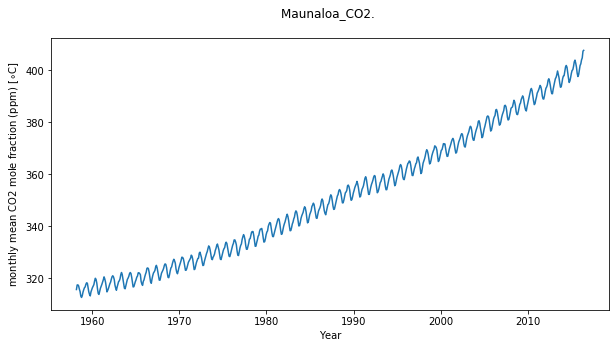

In [4]:
# YOUR CODE HERE
pyplot.figure(figsize=(10, 5))
pyplot.plot(year,co2_avg)
pyplot.title("Maunaloa_CO2. \n")
pyplot.xlabel("Year")
pyplot.ylabel("monthly mean CO2 mole fraction (ppm) [$\circ$C]")

b) Using NumPy, perform a linear regression on the data provided using the `Numpy` built-in functions. Name the coefficients `a_1` and `a_0`, and the fitting function returned by `Numpy` should be named `lin_reg`.

In [5]:
# YOUR CODE HERE
a_1, a_0 = numpy.polyfit(year, co2_avg, 1)
lin_reg = numpy.poly1d((a_1, a_0))

c) Plot the data and the linear regression curve. The plot must include:

* Title
* Label in x-axis
* Label in y-axis with units
* Legend for the linear regression 

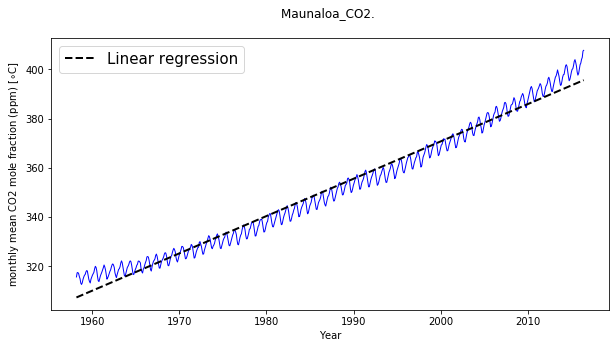

In [6]:
# YOUR CODE HERE
pyplot.figure(figsize=(10, 5))
pyplot.plot(year, co2_avg, color ="blue", linestyle='-', linewidth = 1)
pyplot.plot(year, lin_reg(year), "k--", linewidth=2, label = 'Linear regression')
pyplot.title("Maunaloa_CO2. \n")
pyplot.xlabel("Year")
pyplot.ylabel("monthly mean CO2 mole fraction (ppm) [$\circ$C]")
pyplot.legend(loc = 'best', fontsize = 15)

# Exercise 2


a) Compute the deviations between the original data and the estimated values of $CO_2$ concentration obtained using the linear regression. The deviations are computed by subtracting the estimated values from the original data (data - estimation). The result has to be a NumPy array named `error_lin`, computed without using `for` statment. 

In [7]:
# YOUR CODE HERE
error_lin = co2_avg - lin_reg(year)

b) Plot the `year` vs `error_lin`. The plot must contain:

* Title
* Label in x-axis
* Label in y-axis 

Text(0, 0.5, 'monthly mean CO2 mole fraction (ppm) [$\\circ$C]')

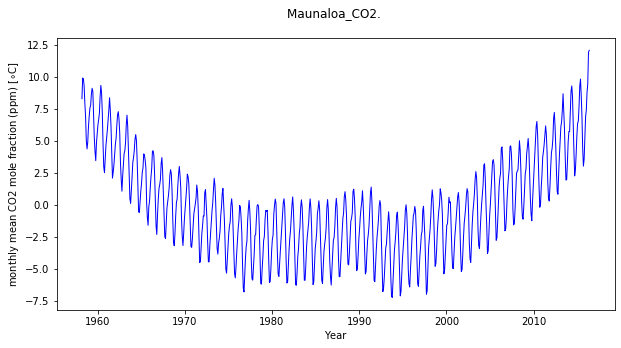

In [8]:
# YOUR CODE HERE
pyplot.figure(figsize=(10, 5))
pyplot.plot(year, error_lin, color ="blue", linestyle='-', linewidth = 1)
pyplot.title("Maunaloa_CO2. \n")
pyplot.xlabel("Year")
pyplot.ylabel("monthly mean CO2 mole fraction (ppm) [$\circ$C]")

# Exercise 3


a) Using [`numpy.polyfit()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and [`numpy.poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), perform a quadratic regression (fit to a second-order polynomial) on the CO2 Mauna Loa Observatory data (`co2_avg` vs `year`) . 

* The coefficients obtained with `numpy.polyfit()`, should be named  `a2`, `a1` and, `a0`. 
* The fitting function, obtained with `numpy.poly1d()`, should be named `quad_reg`.


Remember:

``` python
numpy.polyfit(x, y, deg)
```
where:
```
x : array, x-coordinates of the sample points.

y : array, y-coordinates of the sample points.

deg : int, degree of the fitting polynomial
```

If you still have doubts, go to the links provided above to read the documentation.  



In [9]:
# YOUR CODE HERE
a2, a1, a0 = numpy.polyfit(year, co2_avg, 2)
quad_reg = numpy.poly1d((a2, a1, a0))

b) In the same figure, plot:

* The data,
* The linear regression curve, and 
* The quadratic regression curve.

The plot must contain:

* Title
* Label in x-axis
* Label in y-axis with units
* Legend for the linear regression and quadratic regression.

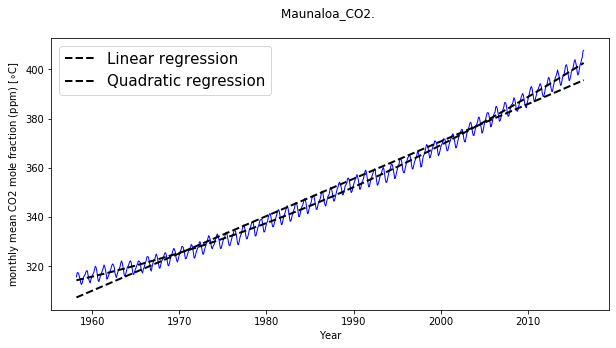

In [10]:
# YOUR CODE HERE
pyplot.figure(figsize=(10, 5))
pyplot.plot(year, co2_avg, color ="blue", linestyle='-', linewidth = 1)
pyplot.plot(year, lin_reg(year), "k--", linewidth=2, label = 'Linear regression')
pyplot.plot(year, quad_reg(year), "k--", linewidth=2, label = 'Quadratic regression')
pyplot.title("Maunaloa_CO2. \n")
pyplot.xlabel("Year")
pyplot.ylabel("monthly mean CO2 mole fraction (ppm) [$\circ$C]")
pyplot.legend(loc = 'best', fontsize = 15)

# Exercise 4

a) Compute the deviations between the original data and the estimated values of $CO_2$ concentration obtained using the quadratic regression. The deviations are computed by subtracting the estimated values from the original data (data - estimation). The result has to be a NumPy array named `error_quad`, computed without using `for` statment. 

In [11]:
# YOUR CODE HERE
error_quad = co2_avg - quad_reg(year)

b) Plot the `year` vs `error_quad`.The plot must contain:

* Title
* Label in x-axis
* Label in y-axis 

Text(0, 0.5, 'monthly mean CO2 mole fraction (ppm) [$\\circ$C]')

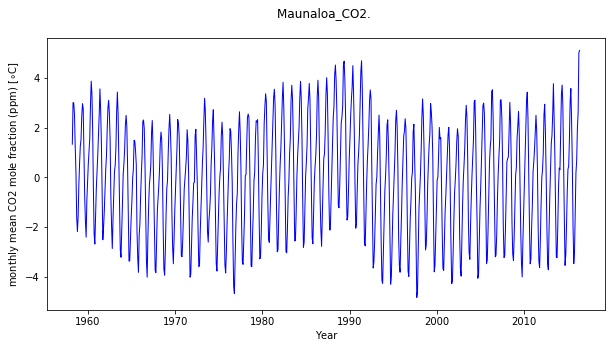

In [12]:
# YOUR CODE HERE
pyplot.figure(figsize=(10, 5))
pyplot.plot(year, error_quad, color ="blue", linestyle='-', linewidth = 1)
pyplot.title("Maunaloa_CO2. \n")
pyplot.xlabel("Year")
pyplot.ylabel("monthly mean CO2 mole fraction (ppm) [$\circ$C]")

# Exercise 5

Discuss what you observe in the plots obtained in exercises 2-b and 4-b, and what this might mean with respect to the chosen model to fit the data. 
### (Not graded)

YOUR ANSWER HERE

### Life expectancy around the world

We will be using data adapted from the [Gampinder Animation](https://python-graph-gallery.com/341-python-gapminder-animation/). The data consist in averages per continent of the life expectancy from 1952 until 2007. 

### Importing data

In this case we will import our data in a multidimensional array. This array will have 12 rows and 6 columns. The first column correspond to the year and the remaining ones are the five continents. The order is as follow:

`year, Africa, Americas, Asia, Europe, Oceania`

In [13]:
url_2 = 'https://raw.githubusercontent.com/engineersCode/EngComp1_offtheground/master/data/life_exp_avg_continent_year.csv'
filename_2 = 'life_exp_avg_continent_year.csv'
urlretrieve(url_2, filename_2)

data = numpy.loadtxt(filename_2, delimiter=',', skiprows=1)

In [14]:
#Uncomment the following line and run the cell to inspect the data. 
#data

## Exercise 6

a) Write a function that takes as argument two `Numpy` arrays and uses the built-in Numpy regression functions to compute and return the coefficients `a1` and `a0`, and the fitting function `f_linear`, in that order. 

In [15]:
def linear_reg(year, continent):
# YOUR CODE HERE
    a1, a0 = numpy.polyfit(year, continent, 1)
    f_linear = numpy.poly1d((a1, a0))
    return a1,a0,f_linear

b) Using the function defined in 6-a), write code that computes the linear regression coefficients `a1` and `a0`, and the function that performs the linear regression for each continent's life expectancy. You will append the coefficients and the function for each continent in lists named `a1_list`, `a0_list` and `f_lin_list` respectively.

Hints:

* Iterate over the continents using  a `for` statement. 
* Call the function defined in 1-a). 
* Append the variables obtained after calling the function to the corresponding lists.


In [16]:
a1_list = list()
a0_list = list()
f_lin_list = list()

# YOUR CODE HERE
year = data[:,0]
Africa = data[:,1]
Americas = data[:,2]
Asia = data[:,3]
Europe = data[:,4]
Oceania = data[:,5]
continents = [Africa, Americas, Asia, Europe, Oceania]

for i in numpy.arange(len(continents)):
    continent = continents[i]
    [a1, a0, f_linear] = linear_reg(year, continent)
    a1_list.append(a1)
    a0_list.append(a0)
    f_lin_list.append(f_linear)
print(a1_list)
print(a0_list)
print(f_lin_list)

    

[0.28952727272727147, 0.3676454545454523, 0.45312097902097587, 0.2219321678321665, 0.21027622377622174]
[-524.2539030303003, -663.0954272727225, -836.8880613053545, -367.4109762237734, -341.91553496503076]
[poly1d([ 2.89527273e-01, -5.24253903e+02]), poly1d([ 3.67645455e-01, -6.63095427e+02]), poly1d([ 4.53120979e-01, -8.36888061e+02]), poly1d([ 2.21932168e-01, -3.67410976e+02]), poly1d([ 2.10276224e-01, -3.41915535e+02])]


c) Using the lists obtained in in 6-b) and using `for` statements, plot in the same figure the life expectancy vs years for each continent and their respective linear regression. For the purpose of legend, we give you a list that contains strings with the names of the continents. 

**Note:** For the linear regressions use the same color and line type, we recommend black. 

The plot must contain:

* Title
* Label in x-axis
* Label in y-axis with units
* Legend only for the continents not for the linear regressions.


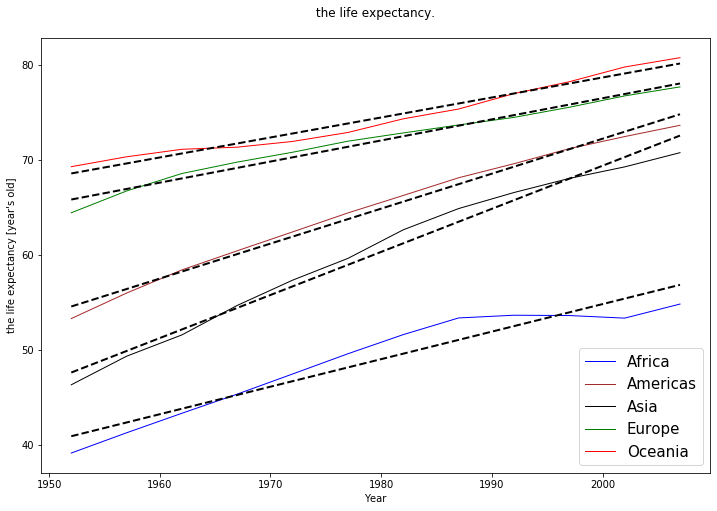

In [26]:
cont_list = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

pyplot.figure(figsize=(12,8))

# YOUR CODE HERE
colors = ['blue', 'brown', 'black', 'green', 'red']
for i in range(len(cont_list)):
    label1 = cont_list[i]
    pyplot.plot(year, continents[i], color = colors[i], linestyle='-', linewidth = 1, label = label1)
    pyplot.plot(year, f_lin_list[i](year), "k--", linewidth=2)
    pyplot.title(" the life expectancy. \n")
    pyplot.xlabel("Year")
    pyplot.ylabel("the life expectancy [year's old]")
    pyplot.legend(loc = 'best', fontsize = 15)

## Remember!!

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you filled in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name at the beggining of the notebook.